In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import plotly.express as px
import arviz as az
import pymc as pm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import bambi as bmb

age: Edad del beneficiario principal del seguro.  
sex: Género del contratista del seguro, puede ser mujer o hombre.
bmi: Índice de masa corporal (IMC), que proporciona una comprensión del peso corporal relativo a la altura. Es un índice objetivo del peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso. Idealmente, valores entre 18.5 y 24.9 se consideran dentro del rango saludable.  
children: Número de hijos cubiertos por el seguro de salud / número de dependientes.  
smoker: Indicador de si el beneficiario fuma o no.  
region: Zona residencial del beneficiario en los Estados Unidos, puede ser noreste, sureste, suroeste, noroeste.  
charges: Costos médicos individuales facturados por el seguro de salud al beneficiario.

Por lo que se espera que los costos aumenten a medida que aumenta la cantidad de hijos

In [229]:
df = pd.read_csv("insurance.csv")

In [52]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [248]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


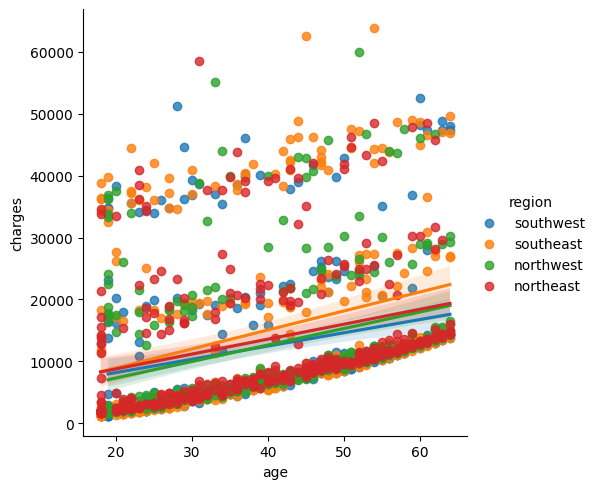

In [194]:
sns.lmplot(x = "age", y = "charges", data = df, hue = "region")

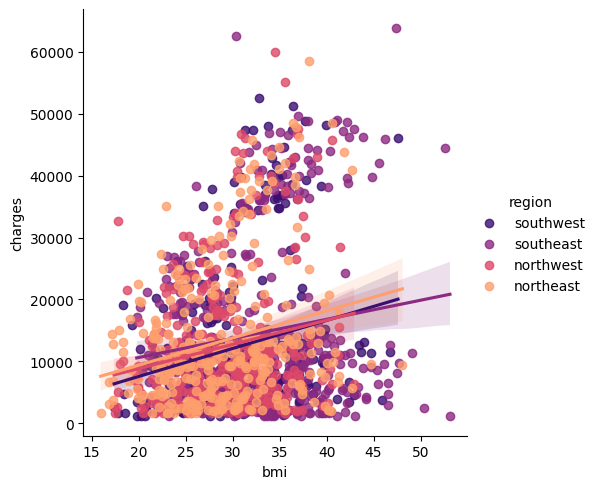

In [195]:
sns.lmplot(x="bmi", y="charges", hue="region", data=df, palette = 'magma')

<Figure size 1500x1000 with 0 Axes>

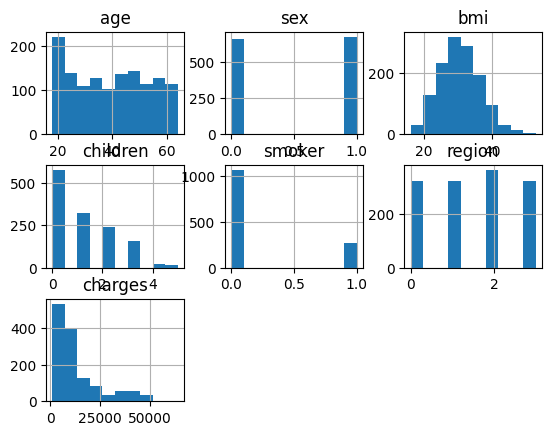

In [125]:
plt.figure(figsize=(15,10))
df.hist()
plt.show()

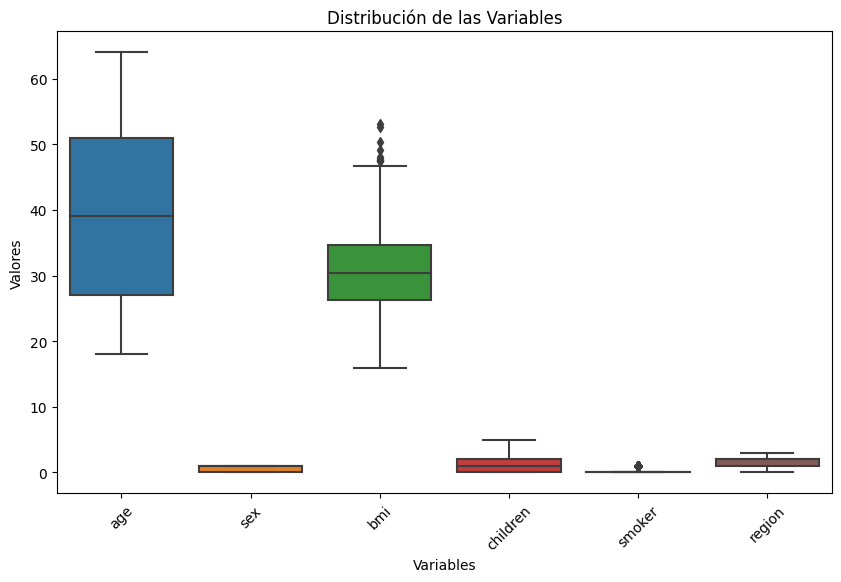

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=x)
plt.xticks(rotation=45)
plt.title('Distribución de las Variables')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

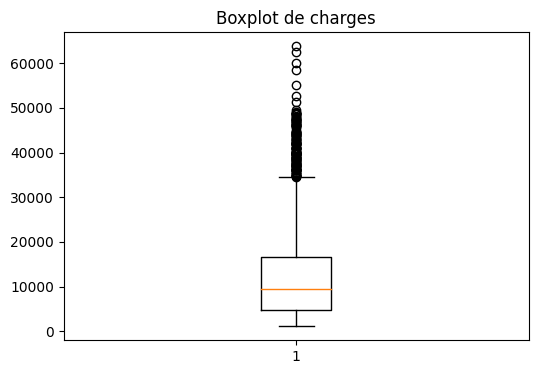

In [196]:
plt.figure(figsize=(6, 4))
plt.title('Boxplot de charges')
plt.boxplot(df['charges'])
plt.show()

In [201]:
# Identificar valores atípicos en 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame original para obtener filas con valores atípicos en 'charges'
outliers_df = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

print(outliers_df)

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [207]:
outliers_df[df['charges'] == 63770.42801]

<ipython-input-207-39b09297faf0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_df[df['charges'] == 63770.42801]


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


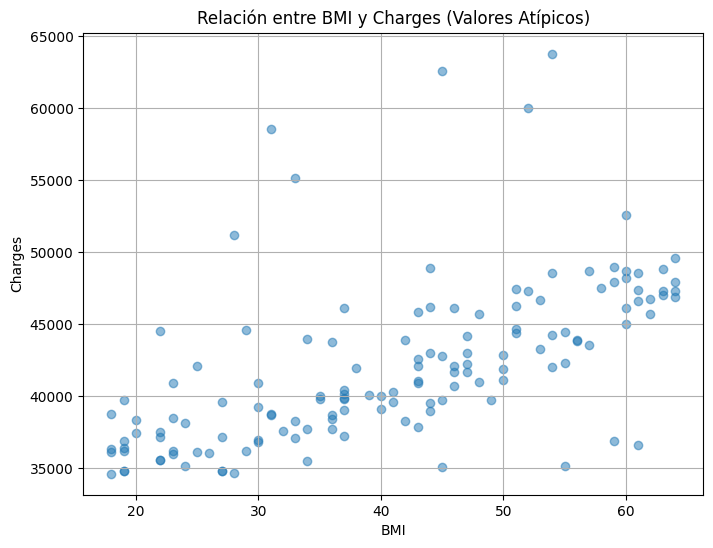

In [216]:
plt.figure(figsize=(8, 6))
plt.scatter(outliers_df['age'], outliers_df['charges'], alpha=0.5)
plt.title('Relación entre BMI y Charges (Valores Atípicos)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

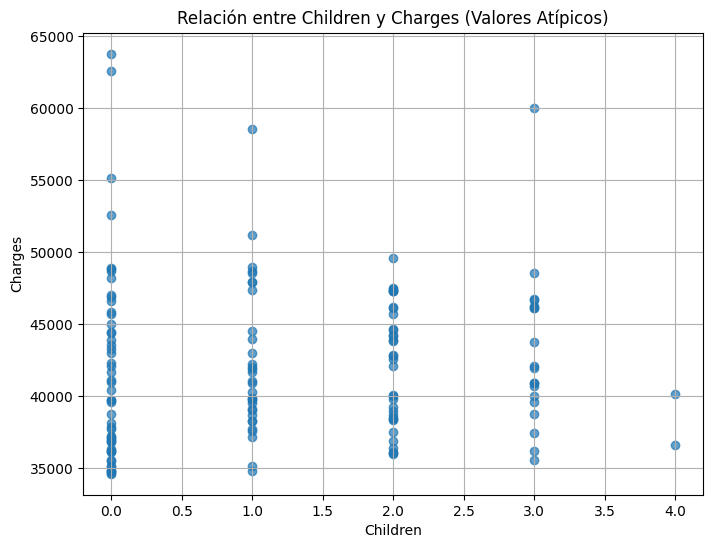

In [217]:
plt.figure(figsize=(8, 6))
plt.scatter(outliers_df['children'], outliers_df['charges'], alpha=0.7)
plt.title('Relación entre Children y Charges (Valores Atípicos)')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

In [249]:
# Cálculo de estadísticas para identificar valores atípicos
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print("Valores atípicos:")
print(outliers)

Valores atípicos:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


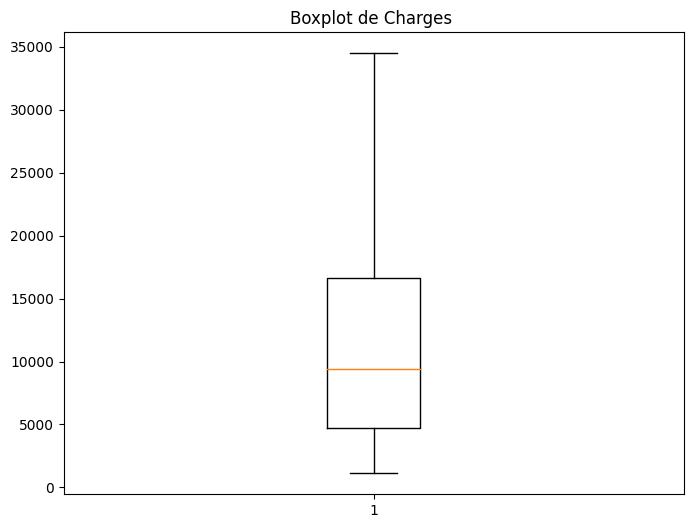

In [238]:
# Winsorization (reemplazo de valores atípicos)
df['charges'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)

# Visualización después de Winsorization
plt.figure(figsize=(8, 6))
plt.boxplot(df['charges'])
plt.title('Boxplot de Charges ')
plt.show()

In [256]:
encoder_sex = LabelEncoder()
encoder_sex.fit(df.sex.drop_duplicates())
mapeo_sex = dict(zip(encoder_sex.transform(encoder_sex.classes_), encoder_sex.classes_))

encoder_smoker = LabelEncoder()
encoder_smoker.fit(df.smoker.drop_duplicates())
mapeo_smoker = dict(zip(encoder_smoker.transform(encoder_smoker.classes_), encoder_smoker.classes_))

encoder_region = LabelEncoder()
encoder_region.fit(df.region.drop_duplicates())
mapeo_region = dict(zip(encoder_region.transform(encoder_region.classes_), encoder_region.classes_))

print("Mapeo para 'sex':", mapeo_sex)
print("Mapeo para 'smoker':", mapeo_smoker)
print("Mapeo para 'region':", mapeo_region)

Mapeo para 'sex': {0: 'female', 1: 'male'}
Mapeo para 'smoker': {0: 'no', 1: 'yes'}
Mapeo para 'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}


In [259]:

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar la columna categórica
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["children"] = label_encoder.fit_transform(df["children"])
df["region"] = label_encoder.fit_transform(df["region"])

In [260]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [263]:
x = df.drop(["charges"], axis = 1)
y = df["charges"]

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [265]:
# Definir las distribuciones previas y la distribución de verosimilitud
with pm.Model() as prior_model:
    # Priors para intercepto y coeficientes
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_age = pm.Normal('beta_age', mu=0, sigma=10)
    beta_sex = pm.Normal('beta_sex', mu=0, sigma=1)
    beta_bmi = pm.Normal('beta_bmi', mu=0, sigma=10)
    beta_children = pm.Normal('beta_children', mu=0, sigma=1)
    beta_smoker = pm.Normal('beta_smoker', mu=0, sigma=1)
    beta_region = pm.Normal('beta_region', mu=0, sigma=1)


    # Distribución de verosimilitud (likelihood)
    likelihood = pm.Normal('likelihood', mu=alpha + beta_age * x_train['age'] + beta_sex * x_train['sex']
                           + beta_bmi * x_train['bmi'] + beta_children * x_train['children'] + beta_smoker * x_train['smoker']
                           + beta_region * x_train['region'],
                           sigma=1, observed=y_train)

# Muestreo de la distribución posterior utilizando MCMC (PyMC3)
with prior_model:
    trace = pm.sample(draws=1000, chains=4, cores=2, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [266]:
# Calcular WAIC y LOO
waic_result_pm = az.waic(trace)
print(f"WAIC: {waic_result_pm.elpd_waic}")
# Calculate LOO
loo_result_pm = az.loo(trace)
print(f"LOO: {loo_result_pm.elpd_loo}")

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1069: RuntimeWarning: overflow encountered in expm1
  x = np.expm1(-kappa * np.log1p(-probs)) / kappa


WAIC: -42445374552.83526


/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


LOO: -42011982149.17989


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta_age'}>,
        <Axes: title={'center': 'beta_age'}>],
       [<Axes: title={'center': 'beta_sex'}>,
        <Axes: title={'center': 'beta_sex'}>],
       [<Axes: title={'center': 'beta_bmi'}>,
        <Axes: title={'center': 'beta_bmi'}>],
       [<Axes: title={'center': 'beta_children'}>,
        <Axes: title={'center': 'beta_children'}>],
       [<Axes: title={'center': 'beta_smoker'}>,
        <Axes: title={'center': 'beta_smoker'}>],
       [<Axes: title={'center': 'beta_region'}>,
        <Axes: title={'center': 'beta_region'}>]], dtype=object)

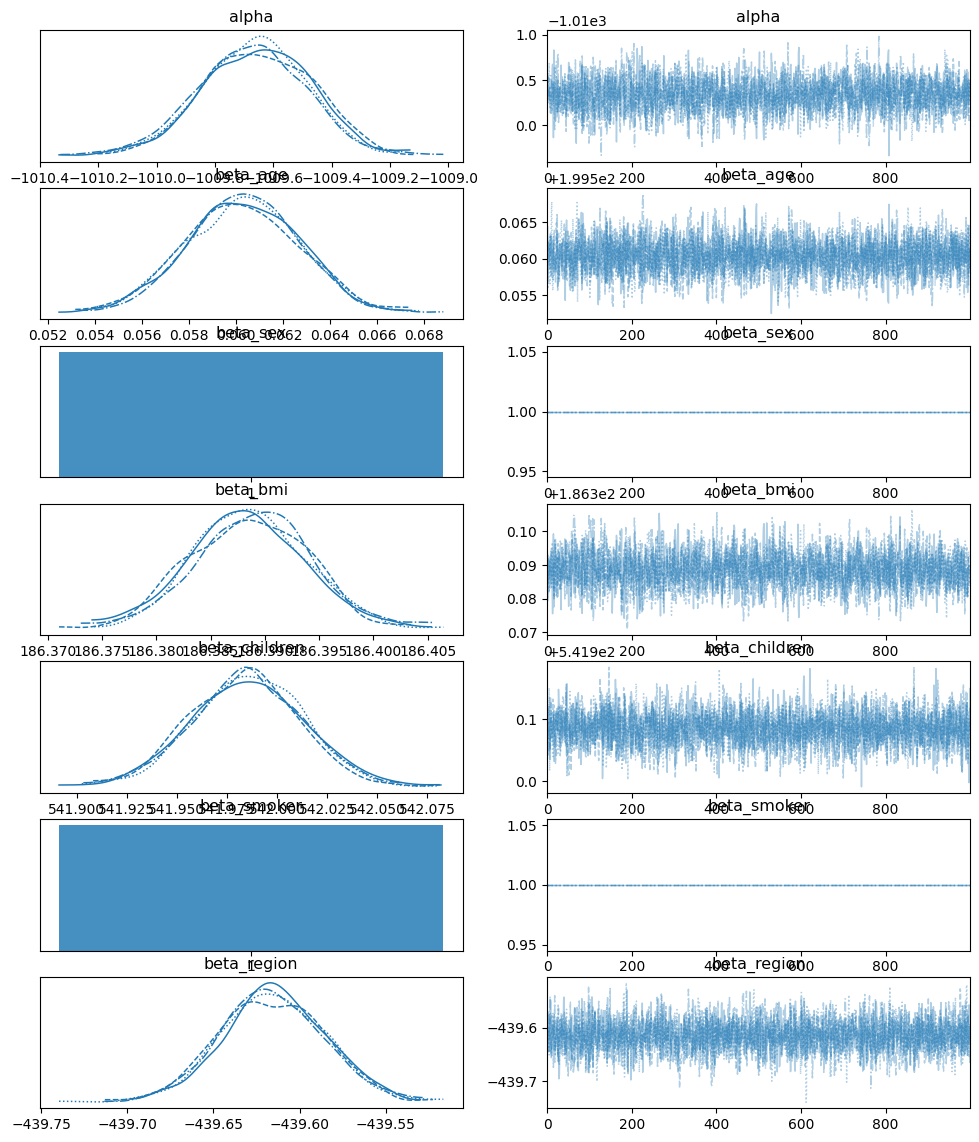

In [267]:
az.plot_trace(trace)

In [268]:
# Combinar datos de entrenamiento
train_data = x_train.copy()
train_data['charges'] = y_train

priors = {
    'alpha': {'mu': 0, 'sigma': 10},  # Distribución previa para el intercepto
    'beta_age': {'mu': 0, 'sigma': 10},  # Distribución previa para 'age'
    'beta_sex': {'mu': 0, 'sigma': 1},  # Distribución previa para 'sex'
    'beta_bmi': {'mu': 0, 'sigma': 10},  # Distribución previa para 'bmi'
    'beta_children': {'mu': 0, 'sigma': 1},  # Distribución previa para 'children'
    'beta_smoker': {'mu': 0, 'sigma': 1},  # Distribución previa para 'smoker'
    'beta_region': {'mu': 0, 'sigma': 1},  # Distribución previa para 'region'
}

# Definir el modelo
model = bmb.Model("charges ~ age + sex + bmi + children + smoker + region", train_data, priors = priors)

# Ajustar el modelo
results = model.fit(draws=1000, chains=4, cores=2, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

In [269]:
# Calcular WAIC y LOO
waic_result_full = az.waic(results)
print(f"WAIC: {waic_result_full.elpd_waic}")
# Calculate LOO
loo_result_full = az.loo(results)
print(f"LOO: {loo_result_full.elpd_loo}")

WAIC: -9346.939172717719
LOO: -9346.953091587971


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-7317.77,995.50,-9130.18,-5450.80,13.06,9.35,5810.20,3324.01,1.0
age,232.94,12.61,209.85,255.87,0.18,0.13,4650.41,3460.16,1.0
sex,-28.57,339.70,-686.21,587.94,4.57,5.09,5556.33,3392.28,1.0
bmi,212.91,28.15,158.29,262.64,0.40,0.29,4885.11,3270.01,1.0
children,444.67,141.53,192.76,718.00,1.97,1.49,5141.19,2709.42,1.0
smoker,19738.32,430.83,18943.43,20549.67,6.63,4.69,4237.11,3008.16,1.0
region,-253.56,159.82,-550.26,53.65,2.34,1.78,4647.67,3200.02,1.0
charges_sigma,5229.65,122.22,5000.75,5453.10,1.73,1.22,4969.22,3416.51,1.0


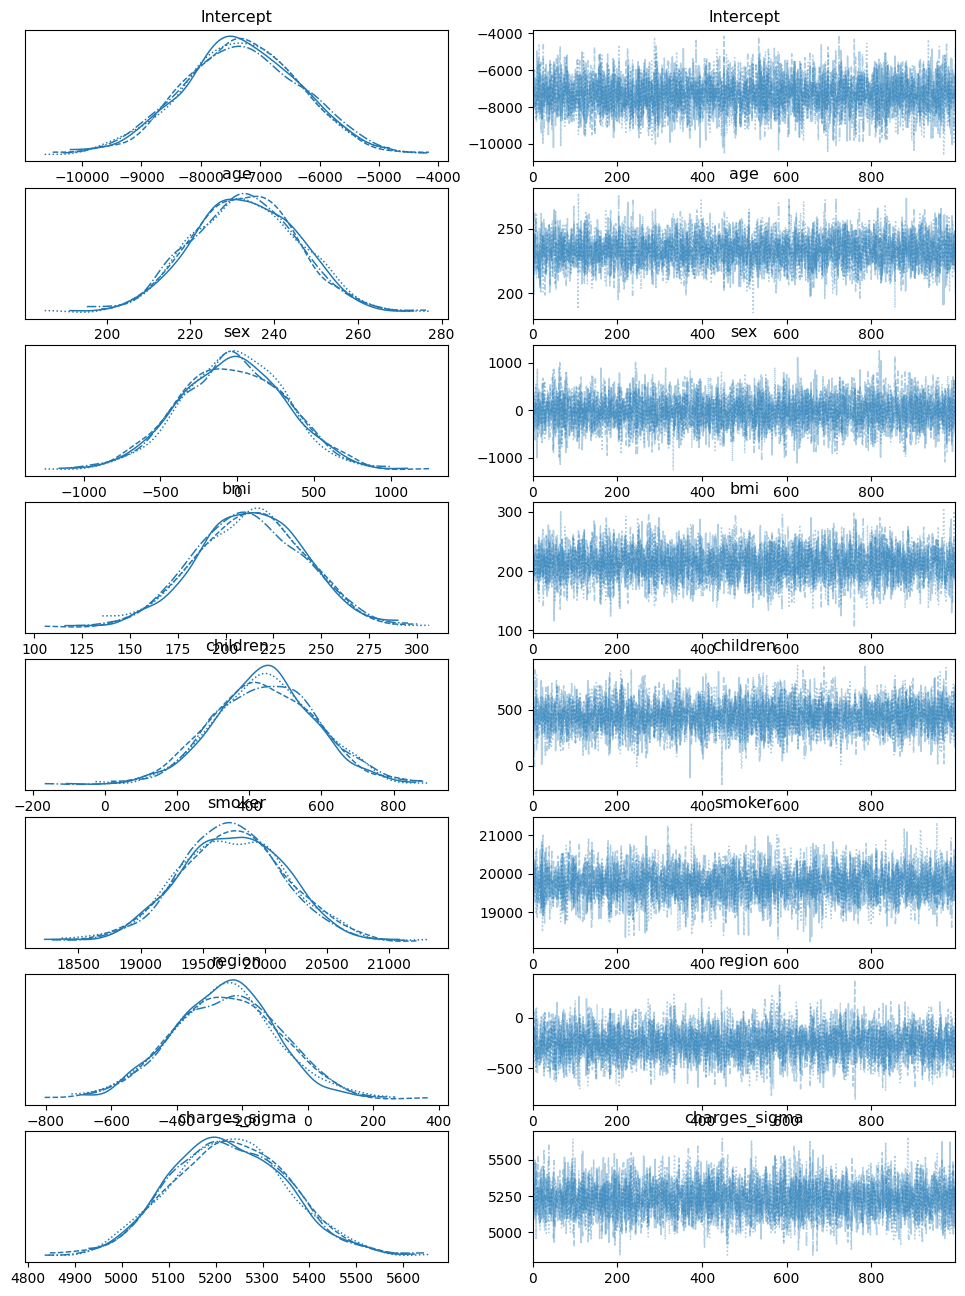

In [270]:
# Use ArviZ to plot the results
az.plot_trace(results)

# Key summary and diagnostic info on the model parameters
az.summary(results, round_to=2)

In [271]:
# Estimaciones puntuales (medias) de los parámetros
posterior_samples = results.posterior
parameter_means = posterior_samples.mean(dim='chain')
print("Estimaciones puntuales de parámetros:")
print(parameter_means)


Estimaciones puntuales de parámetros:
<xarray.Dataset>
Dimensions:        (draw: 1000)
Coordinates:
  * draw           (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    Intercept      (draw) float64 -6.816e+03 -6.506e+03 ... -6.853e+03
    age            (draw) float64 229.0 228.7 224.5 235.7 ... 234.5 230.9 225.5
    sex            (draw) float64 7.901 105.3 75.75 ... -88.88 -32.65 118.2
    bmi            (draw) float64 195.7 188.1 212.0 210.7 ... 207.6 220.7 206.2
    children       (draw) float64 417.6 406.2 358.4 461.8 ... 290.1 554.9 428.3
    smoker         (draw) float64 1.944e+04 1.975e+04 ... 1.999e+04 1.995e+04
    region         (draw) float64 -111.7 -220.3 -140.7 ... -322.5 -223.8 -161.0
    charges_sigma  (draw) float64 5.135e+03 5.24e+03 ... 5.215e+03 5.242e+03


In [272]:
# Intervalos de credibilidad
parameter_credible_intervals = az.hdi(posterior_samples, hdi_prob=0.95)
print("Intervalos de credibilidad (95%) de parámetros:")
print(parameter_credible_intervals)


Intervalos de credibilidad (95%) de parámetros:
<xarray.Dataset>
Dimensions:        (hdi: 2)
Coordinates:
  * hdi            (hdi) <U6 'lower' 'higher'
Data variables:
    Intercept      (hdi) float64 -9.279e+03 -5.429e+03
    age            (hdi) float64 209.8 257.8
    sex            (hdi) float64 -729.7 597.7
    bmi            (hdi) float64 158.3 266.9
    children       (hdi) float64 186.7 736.4
    smoker         (hdi) float64 1.894e+04 2.061e+04
    region         (hdi) float64 -565.7 59.2
    charges_sigma  (hdi) float64 4.998e+03 5.468e+03


In [273]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("mean squared error:", mean_squared_error(y_test, y_test_pred))
print("R2 score:", r2_score(y_test, y_test_pred))

mean squared error: 23657243.489045657
R2 score: 0.7833541044095484


### Aplicacion de fuerza bruta

In [275]:
from itertools import combinations

variables = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6']
max_variables_por_combinacion = 4

total_combinaciones = 0
for r in range(1, max_variables_por_combinacion + 1):
    combinaciones = list(combinations(variables, r))
    total_combinaciones += len(combinaciones)

print(f"La cantidad total de combinaciones posibles es: {total_combinaciones}")


La cantidad total de combinaciones posibles es: 56


In [276]:
# Lista de todas tus variables
all_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_variable = 'charges'

# Crear una lista para almacenar los resultados de cada combinación
results_list = []

# Iterar a través de todas las combinaciones posibles de hasta 4 variables
for r in range(1, 5):
    combinations_list = list(combinations(all_variables, r))
    for combo in combinations_list:
        # Crear la fórmula del modelo para esta combinación
        formula = f"{target_variable} ~ {' + '.join(combo)}"

        # Definir y ajustar el modelo
        model = bmb.Model(formula, train_data, priors = priors)
        results = model.fit(draws=1000, chains=4, cores=2, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

        # Calcular WAIC y LOO para esta combinación
        waic_result = az.waic(results)
        loo_result = az.loo(results)

        # Almacenar los resultados junto con la combinación
        results_list.append((combo, waic_result, loo_result))

# Ordenar los resultados por menor LOO y WAIC
results_list.sort(key=lambda x: (x[2].elpd_loo, x[1].elpd_waic))


In [277]:
for i, (combo, waic_result, loo_result) in enumerate(results_list[:56]):
    print(f"Top {i+1} combination: {combo}")
    print(f"WAIC: {waic_result.elpd_waic}")
    print(f"LOO: {loo_result.elpd_loo}")
    print("--------------------------------------")

Top 1 combination: ('region',)
WAIC: -9953.628239894206
LOO: -9953.632049564894
--------------------------------------
Top 2 combination: ('sex', 'region')
WAIC: -9953.56244622889
LOO: -9953.567830951783
--------------------------------------
Top 3 combination: ('sex',)
WAIC: -9953.204567733676
LOO: -9953.208779522189
--------------------------------------
Top 4 combination: ('sex', 'children', 'region')
WAIC: -9951.35258340406
LOO: -9951.359959917889
--------------------------------------
Top 5 combination: ('children', 'region')
WAIC: -9951.308059425863
LOO: -9951.314071161
--------------------------------------
Top 6 combination: ('children',)
WAIC: -9951.085140914758
LOO: -9951.089752421747
--------------------------------------
Top 7 combination: ('sex', 'children')
WAIC: -9951.071745155234
LOO: -9951.077473680825
--------------------------------------
Top 8 combination: ('sex', 'bmi')
WAIC: -9944.836901520095
LOO: -9944.841323654717
--------------------------------------
Top 9 co

In [280]:
# Nuevo modelo con variables significativas
model_reduced = bmb.Model("charges ~ age + bmi + children + smoker", train_data)
results_reduced = model_reduced.fit(draws=1000, chains=4, cores=2, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

In [281]:
# Calcular WAIC y LOO
waic_result_full = az.waic(results_reduced)
print(f"WAIC: {waic_result_full.elpd_waic}")
# Calculate LOO
loo_result_full = az.loo(results_reduced)
print(f"LOO: {loo_result_full.elpd_loo}")

WAIC: -9346.098792729466
LOO: -9346.109285540459


    rank: El rango del modelo en comparación. Un rango más bajo indica un mejor rendimiento según LOO.

    elpd_loo: Puntuación de log-probabilidad esperada de LOO (expected log predictive density). Un valor más alto es mejor, ya que indica una mejor capacidad predictiva.

    p_loo: Error estándar de la puntuación de LOO. Muestra la incertidumbre asociada con la estimación de LOO. Valores más bajos indican mayor precisión.

    elpd_diff: Diferencia en la puntuación de log-probabilidad esperada entre modelos. Aquí, es la diferencia entre el modelo completo y el modelo reducido. Un valor positivo indica que el modelo completo tiene un rendimiento predictivo superior.

    weight: Peso relativo de cada modelo basado en LOO. Indica la probabilidad relativa de que un modelo sea el mejor entre los comparados.

    se (dse): Error estándar (desviación estándar del error) asociado con el cálculo de la puntuación de LOO. Muestra la incertidumbre en la estimación de LOO.

    warning: Indicador de advertencia. Aquí, se muestra como 'False', lo que indica que no hay advertencias en el cálculo.

    scale: Escala utilizada en el cálculo de la puntuación de LOO. Por ejemplo, 'log' indica que se utilizó el logaritmo.

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'smoker'}>],
       [<Axes: title={'center': 'charges_sigma'}>,
        <Axes: title={'center': 'charges_sigma'}>]], dtype=object)

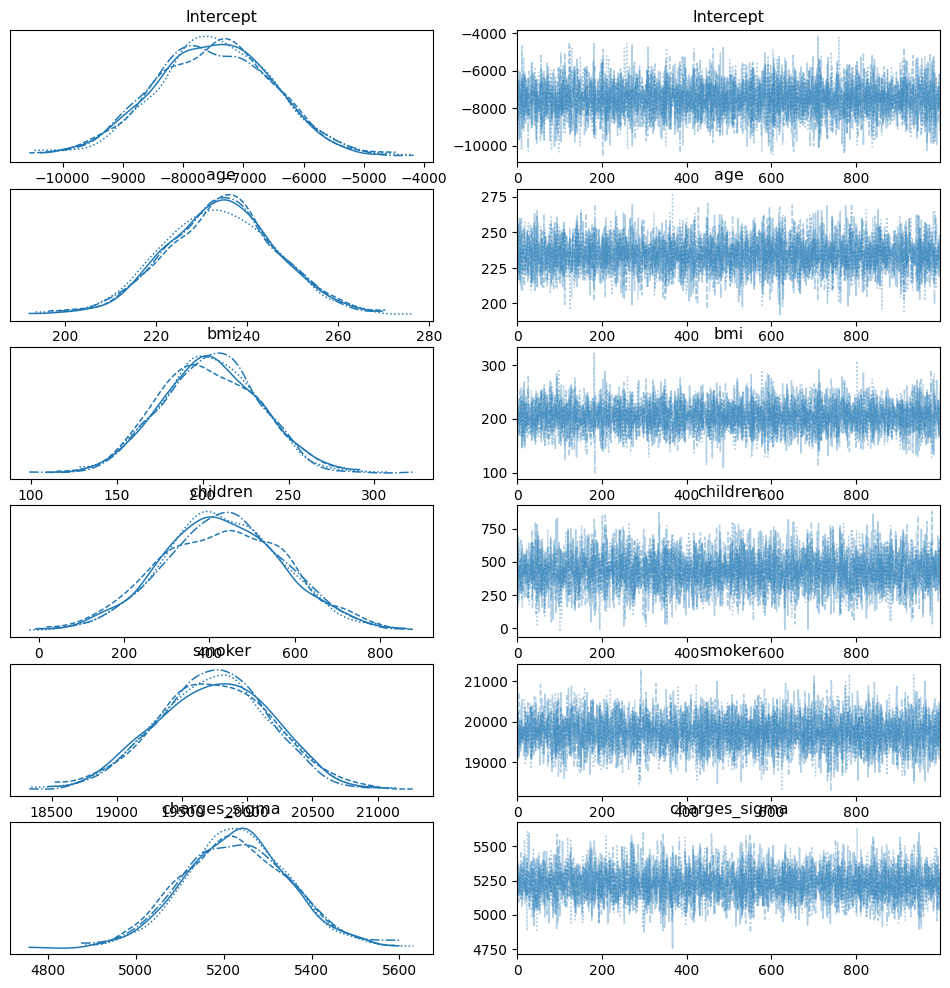

In [283]:
# Use ArviZ to plot the results
az.plot_trace(results_reduced)


In [284]:

# Key summary and diagnostic info on the model parameters
az.summary(results_reduced, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-7498.05,977.92,-9354.29,-5722.62,11.79,8.34,6808.11,3373.83,1.0
age,234.29,12.13,211.33,256.84,0.14,0.10,7322.84,3453.99,1.0
bmi,204.22,28.28,154.61,258.12,0.35,0.25,6352.57,3247.81,1.0
children,431.78,142.57,155.73,695.29,1.89,1.42,5667.65,3055.90,1.0
smoker,19743.18,433.61,18964.36,20559.92,5.35,3.78,6576.10,3354.77,1.0
charges_sigma,5229.56,120.74,5014.56,5473.27,1.68,1.19,5156.38,2935.79,1.0


In [285]:
az.compare({'Modelo completo': results, 'Modelo reducido': results_reduced})

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Modelo reducido,0,-9346.109286,8.169316,0.000000,0.924302,37.518824,0.000000,False,log
Modelo completo,1,-9496.339315,7.022798,150.230029,0.075698,30.556860,18.102107,False,log


In [288]:
# Acceder a las muestras de la distribución posterior
posterior_samples = results_reduced.posterior

# Obtener la media y desviación estándar de cada parámetro
mean_parameters = posterior_samples.mean(dim=('chain', 'draw'))
std_parameters = posterior_samples.std(dim=('chain', 'draw'))

# Mostrar resultados
print("Media de parámetros:")
print(mean_parameters)

print("\nDesviación estándar de parámetros:")
print(std_parameters)


Media de parámetros:
<xarray.Dataset>
Dimensions:        ()
Data variables:
    Intercept      float64 -7.498e+03
    age            float64 234.3
    bmi            float64 204.2
    children       float64 431.8
    smoker         float64 1.974e+04
    charges_sigma  float64 5.23e+03

Desviación estándar de parámetros:
<xarray.Dataset>
Dimensions:        ()
Data variables:
    Intercept      float64 977.8
    age            float64 12.13
    bmi            float64 28.28
    children       float64 142.6
    smoker         float64 433.6
    charges_sigma  float64 120.7


In [289]:

# Análisis de distribuciones posteriores
posterior_samples = results_reduced.posterior
results_reduced

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [290]:
# Visualizar intervalos de credibilidad
cred_intervals = results_reduced.posterior.stack(level=["chain", "draw"]).quantile([0.025, 0.975])
print(cred_intervals)

<xarray.Dataset>
Dimensions:        (quantile: 2)
Coordinates:
  * quantile       (quantile) float64 0.025 0.975
Data variables:
    Intercept      (quantile) float64 -9.404e+03 -5.623e+03
    age            (quantile) float64 210.6 258.7
    bmi            (quantile) float64 151.1 257.9
    children       (quantile) float64 155.8 716.4
    smoker         (quantile) float64 1.888e+04 2.055e+04
    charges_sigma  (quantile) float64 4.994e+03 5.476e+03
